In [22]:
import os.path
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [27]:
EXT = "*.csv"
station_ids = os.listdir("../local_data_clean/20230801/")
ts = pd.DataFrame()
for station_id in station_ids:
    PATH = f"../local_data_clean/20230801/{station_id}"
    ts_filename = [file
                    for path, subdir, files in os.walk(PATH)
                    for file in glob(os.path.join(path, EXT))][0]
    temp = pd.read_csv(ts_filename, parse_dates=["datetime", "date"])
    temp["station"] = int(station_id)
    ts = pd.concat([ts,temp])


In [28]:
ts

,timestamp,value,datetime,date,avg,station
0,1690754400000,14.900,2023-07-30 22:00:00,2023-07-30,16.650000,1030
1,1690758000000,18.400,2023-07-30 23:00:00,2023-07-30,16.650000,1030
2,1690761600000,17.400,2023-07-31 00:00:00,2023-07-31,11.900000,1030
3,1690765200000,16.400,2023-07-31 01:00:00,2023-07-31,11.900000,1030
4,1690768800000,18.400,2023-07-31 02:00:00,2023-07-31,11.900000,1030
...,...,...,...,...,...,...
20,1690826400000,1.271,2023-07-31 18:00:00,2023-07-31,3.632826,1753
21,1690830000000,0.271,2023-07-31 19:00:00,2023-07-31,3.632826,1753
22,1690833600000,0.271,2023-07-31 20:00:00,2023-07-31,3.632826,1753
23,1690837200000,0.000,2023-07-31 21:00:00,2023-07-31,3.632826,1753


In [23]:
def data_from_api(url):
    response_status = requests.get(url)
    response = response_status.json()
    df = pd.json_normalize(response)
    return df

stations_info = data_from_api("https://geo.irceline.be/sos/api/v1/stations/?expanded=false")


In [24]:
stations_info

,type,properties.id,properties.label,geometry.coordinates,geometry.type
0,Feature,1030,40AL01 - Linkeroever,"[4.385223684454717, 51.23619419990248, NaN]",Point
1,Feature,1031,40AL02 - Beveren,"[4.234832753144059, 51.30452079034428, NaN]",Point
2,Feature,1032,40AL03 - Beveren,"[4.201460395126572, 51.25396488066997, NaN]",Point
3,Feature,1033,40AL04 - Beveren,"[4.293329476940385, 51.2906675267468, NaN]",Point
4,Feature,1034,40AL05 - Beveren,"[4.278889821667828, 51.2631177168737, NaN]",Point
...,...,...,...,...,...
118,Feature,1241,47E716 - Mariakerke,"[3.6828130172031206, 51.06698790152168, NaN]",Point
119,Feature,1716,47E814 - Ham,"[5.129718074812025, 51.08218722351412, NaN]",Point
120,Feature,1752,48R515 - Aeroport 1,"[4.425464746587246, 50.45160018054414, NaN]",Point
121,Feature,1753,48R516 - Aeroport 2,"[4.484957959246502, 50.46913160387411, NaN]",Point


In [38]:
ts=ts.merge(stations_info, left_on="station", right_on="properties.id")

In [30]:
ts_avg = ts.loc[ts.date=="2023-07-31", ["station", "avg"]].drop_duplicates()
ts_avg = ts_avg.merge(stations_info, left_on="station", right_on="properties.id")
ts_avg

,station,avg,type,properties.id,properties.label,geometry.coordinates,geometry.type
0,1030,11.900000,Feature,1030,40AL01 - Linkeroever,"[4.385223684454717, 51.23619419990248, NaN]",Point
1,1031,11.247826,Feature,1031,40AL02 - Beveren,"[4.234832753144059, 51.30452079034428, NaN]",Point
2,1032,10.378261,Feature,1032,40AL03 - Beveren,"[4.201460395126572, 51.25396488066997, NaN]",Point
3,1033,10.639130,Feature,1033,40AL04 - Beveren,"[4.293329476940385, 51.2906675267468, NaN]",Point
4,1034,14.052174,Feature,1034,40AL05 - Beveren,"[4.278889821667828, 51.2631177168737, NaN]",Point
...,...,...,...,...,...,...,...
70,1219,3.939043,Feature,1219,45R510 - Châtelineau,"[4.521130208130443, 50.41643335953812, NaN]",Point
71,1220,2.971000,Feature,1220,45R511 - Marcinelle,"[4.424700450402466, 50.37759210212818, NaN]",Point
72,1221,4.166391,Feature,1221,45R512 - Marchienne,"[4.3958971170392385, 50.407810199416744, NaN]",Point
73,1752,3.290913,Feature,1752,48R515 - Aeroport 1,"[4.425464746587246, 50.45160018054414, NaN]",Point


In [42]:
bottom10 = ts_avg.sort_values("avg", ascending=False).head(10)
top10 = ts_avg.sort_values("avg", ascending=True).head(10)

<Axes: xlabel='avg', ylabel='properties.label'>

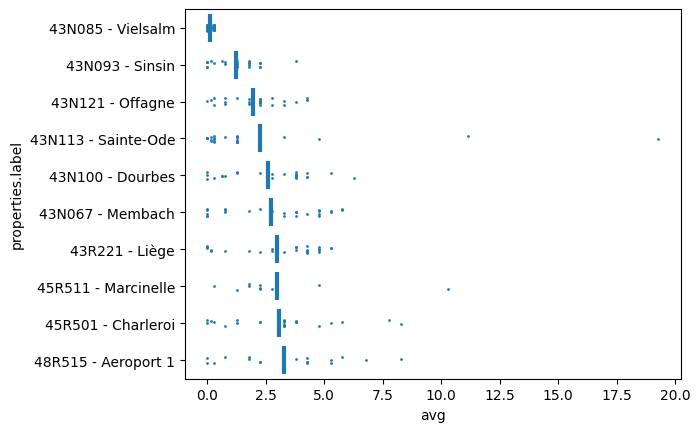

In [63]:
which10 = top10
sns.pointplot(data=which10, y="properties.label", x="avg",
    linestyle="none",
    marker="|", markersize=20, markeredgewidth=3)
sns.stripplot(data=ts[ts.station.isin(which10.station)], y="properties.label", x="value", size=2)
